# CNN을 활용한 이미지 인식: MNIST

In [ ]:
## 참고자료
# PyTorch로 시작하는 딥 러닝 입문
# https://wikidocs.net/book/2788

In [2]:
# 한글 폰트 설치

!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

zsh:1: no matches found: fonts-nanum*
Password:sudo: a password is required


In [3]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [4]:
# 라이브러리 임포트

import numpy as np
import matplotlib.pyplot as plt

# 폰트 관련 용도
import matplotlib.font_manager as fm

# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
# path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window
font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.12/site-

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: initialization failed

In [5]:
import torch
from torch import nn, optim
from torchinfo import summary
from torchviz import make_dot
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# from IPython.display import Image
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.12/site-

cpu


In [ ]:
# 기본 폰트 설정
# 윈도우에서는 "malgun.ttf" 혹은 "NanumBarunGothic.ttf" 등을 사용할 수 있다. 맥에서는 "AppleGothic.ttf"
# plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = ':'


# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [2]:
dir(datasets)

['CIFAR10',
 'CIFAR100',
 'CLEVRClassification',
 'CREStereo',
 'Caltech101',
 'Caltech256',
 'CarlaStereo',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'Country211',
 'DTD',
 'DatasetFolder',
 'EMNIST',
 'ETH3DStereo',
 'EuroSAT',
 'FER2013',
 'FGVCAircraft',
 'FakeData',
 'FallingThingsStereo',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'Flowers102',
 'FlyingChairs',
 'FlyingThings3D',
 'Food101',
 'GTSRB',
 'HD1K',
 'HMDB51',
 'INaturalist',
 'ImageFolder',
 'ImageNet',
 'Imagenette',
 'InStereo2k',
 'KMNIST',
 'Kinetics',
 'Kitti',
 'Kitti2012Stereo',
 'Kitti2015Stereo',
 'KittiFlow',
 'LFWPairs',
 'LFWPeople',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Middlebury2014Stereo',
 'MovingMNIST',
 'Omniglot',
 'OxfordIIITPet',
 'PCAM',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'RenderedSST2',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SUN397',
 'SVHN',
 'SceneFlowStereo',
 'Sintel',
 'SintelStereo',
 'StanfordCars',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 

## CNN MNIST 분석하기

In [2]:
# Convolutional Neural network (CNN)
# Image(url = "https://assets-global.website-files.com/614c82ed388d53640613982e/646371e3bdc5ca90dee5331b_convolutional-neural-network%20(1).webp",
#       width = 800)

In [4]:
# # RGB Convolution filter
# Image(url = "https://wikidocs.net/images/page/64066/conv15.png",
#        width = 800)

In [5]:
# Stride
# Image(url = "https://editor.analyticsvidhya.com/uploads/33383str.jpg",
#       width = 800)

In [6]:
# Image(url = "https://i0.wp.com/syncedreview.com/wp-content/uploads/2017/05/13.png?resize=330%2C230&ssl=1",
#      width = 800)

In [7]:
# # Zero padding
# Image(url = "https://miro.medium.com/v2/resize:fit:720/format:webp/1*noYcUAa_P8nRilg3Lt_nuA.png",
#       width = 800)

In [8]:
# # Max pooling
# Image(url = "https://production-media.paperswithcode.com/methods/MaxpoolSample2.png",
#       width = 800)

## Convolution fitler1

In [5]:

conv1 = nn.Conv2d(1, 32, kernel_size = 3, stride = 1, padding = 1)
# Conv2d(in_channels = 1, out_channels = 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
print("Conv1 = ", conv1)
print("Conv weight = \n", conv1.weight)
print("Conv weight shape = \n", conv1.weight.shape)
print("Conv bias shape = \n", conv1.bias.shape)

Conv1 =  Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv weight = 
 Parameter containing:
tensor([[[[-3.3081e-01,  2.8307e-01, -8.8341e-02],
          [ 2.7900e-01, -2.0197e-01, -7.2463e-02],
          [-6.1401e-02, -9.5293e-03, -2.8502e-01]]],


        [[[-2.2489e-01,  2.0240e-01,  2.8502e-01],
          [-2.7654e-01,  1.2325e-01,  1.7512e-01],
          [ 2.1201e-01, -3.8937e-02, -2.3829e-01]]],


        [[[ 2.2863e-01, -1.4200e-01, -2.9325e-01],
          [ 2.0496e-01,  1.1462e-02,  2.9099e-02],
          [-1.2402e-01,  1.0603e-01, -1.5910e-01]]],


        [[[-2.2238e-01,  8.5256e-02, -2.6042e-02],
          [-2.0997e-01,  2.5025e-01, -2.4215e-01],
          [-3.0305e-02,  6.0895e-02,  1.2498e-01]]],


        [[[-7.8460e-03, -2.3179e-01, -3.0079e-01],
          [ 9.7933e-02, -3.1752e-01,  2.1261e-01],
          [-1.2620e-01, -1.6273e-01, -8.1453e-03]]],


        [[[-3.1212e-01,  3.9568e-02, -1.8585e-01],
          [-1.5238e-01, -3.0681e-01, -1.3481e-01],
 

In [20]:
## Max pooling
torch.manual_seed(0)
pool = nn.MaxPool2d(2)
inputs = torch.randint(1, 10, (1 ,4, 4))
print(inputs)
pool(inputs)

tensor([[[9, 1, 3, 7],
         [8, 7, 8, 2],
         [2, 1, 9, 3],
         [7, 4, 2, 3]]])


tensor([[[9, 8],
         [7, 9]]])

In [ ]:
## Data load
mnist_train = datasets.MNIST(root = "./",
                          train = True,
                          download = True,
                          transform = transforms.ToTensor(), )

mnist_test = datasets.MNIST(root = "./",
                         train = False,
                         download = True,
                         transform = transforms.ToTensor(),
                         )


In [23]:
print(mnist_train.data.shape)
print(mnist_train.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


In [ ]:
batch_size = 100

data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True)

test_loader = DataLoader(dataset=mnist_test,
                         batch_size=batch_size,
                         shuffle=False)

In [76]:
# torch.nn.init.constant_(tensor, val): 상수로 설정
# torch.nn.init.ones_(tensor): 1로 설정
# torch.nn.init.zeros_(tensor): 0으로 설정
# torch.nn.init.unifiom_(tensor, a=0.0, b=1.0): a부터 b사이의 값을 균일한 분포로 설정
# torch.nn.init.normal_(tensor, mean=0.0, std=1.0): 평균이 0이고 표준편차가 1인 분포로 설정
# torch.nn.init.xavier_uniform_(tensor, gain=1.0)

class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(32), # num_features = 입력채널갯수
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.fc = nn.Linear(7*7*64, 10, bias = True)
    self.flatten = nn.Flatten()
    # nn.init.xavier_uniform_(self.fc.weight)


  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.flatten(out)
    out = self.fc(out)
    return out

model = CNN().to(device)

In [77]:
lr = 0.001

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr)

In [78]:
total_batch = len(data_loader)
print("총 배치의 수 : {}".format(total_batch))

총 배치의 수 : 600


In [79]:
for train_X, train_Y in data_loader:
    break

In [80]:
train_X = train_X.to(device)
train_Y = train_Y.to(device)
print(train_X.shape)
print(train_Y.shape)

pred = model(train_X)
print(pred.shape)
pred
train_Y

torch.Size([100, 1, 28, 28])
torch.Size([100])
torch.Size([100, 10])


tensor([2, 7, 0, 6, 0, 6, 5, 6, 5, 6, 4, 1, 4, 2, 4, 1, 2, 3, 6, 0, 1, 1, 5, 9,
        0, 2, 2, 8, 9, 0, 4, 2, 4, 4, 6, 3, 9, 1, 2, 6, 5, 6, 6, 0, 3, 2, 3, 1,
        3, 7, 2, 3, 3, 9, 7, 9, 9, 4, 5, 0, 4, 5, 0, 6, 4, 9, 4, 8, 9, 7, 1, 3,
        7, 8, 7, 9, 3, 4, 6, 6, 9, 1, 1, 1, 3, 9, 4, 9, 3, 5, 2, 1, 3, 3, 5, 1,
        4, 9, 8, 5], device='cuda:0')

In [ ]:
from tqdm.notebook import tqdm
training_epochs = 15
cost_list = []

for epoch in range(training_epochs):
    avg_cost = 0

    for train_X, train_Y in tqdm(data_loader): # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        # print(X.shape) # X shape = [100, 1, 28, 28]
        # print(Y.shape) # Y shape = [100]
        train_X = train_X.to(device)
        train_Y = train_Y.to(device)

        hypothesis = model(train_X)
        cost = criterion(hypothesis, train_Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost.item()
    cost_list.append(avg_cost/len(data_loader))

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch, avg_cost))

  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:    0] cost = 18.7508817


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:    1] cost = 15.3100248


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:    2] cost = 11.6981091


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:    3] cost = 10.5069784


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:    4] cost = 8.84468057


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:    5] cost = 7.93015326


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:    6] cost = 6.44638683


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:    7] cost = 5.42609911


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:    8] cost = 4.57347629


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:    9] cost = 5.55787236


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:   10] cost = 4.55221047


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:   11] cost = 2.54149147


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:   12] cost = 2.58882186


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:   13] cost = 3.93939597


  0%|          | 0/600 [00:00<?, ?it/s]

[Epoch:   14] cost = 2.29152485


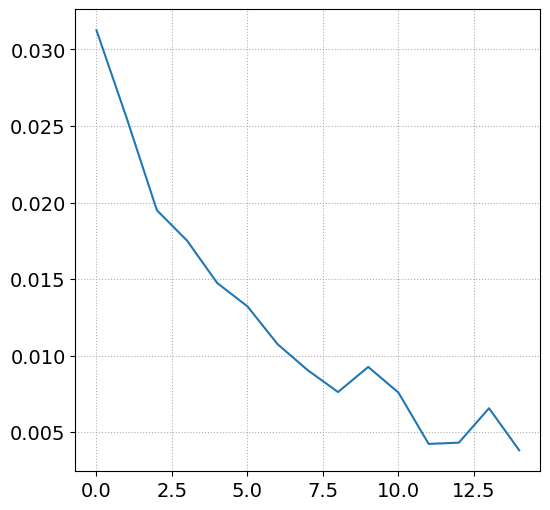

In [84]:
plt.plot(cost_list)
plt.show()

## CNN Fashion MNIST 분석하기

In [90]:
## Fashion mnist
fmnist_train = datasets.FashionMNIST(root='./',
                                   train=True,
                                   download=True,
                                   transform=transforms.ToTensor()
                                  )

fmnist_test = datasets.FashionMNIST(root='./',
                                  train=False,
                                  download=True,
                                  transform=transforms.ToTensor()
                                 )
print(fmnist_train.data.shape)
print(fmnist_test.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([10000])


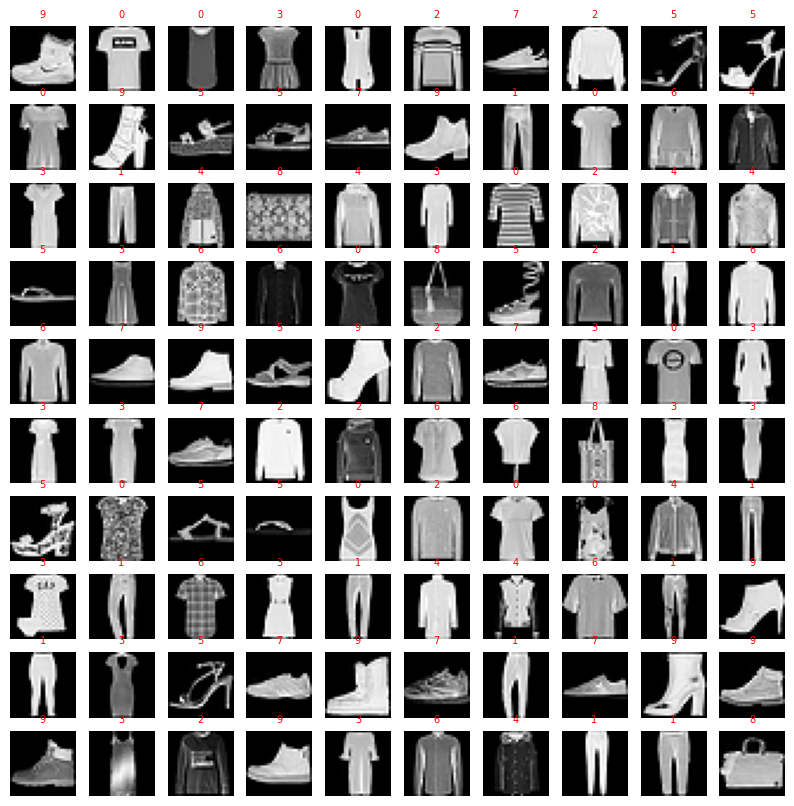

In [88]:
fig, axs = plt.subplots(10, 10, figsize = (10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fmnist_train.data[10*i + j],  cmap = 'gray')
    axs[i, j].axis("off")
    axs[i, j].set_title(fmnist_train.targets.numpy()[10*i + j], size = 7, c = 'r')
plt.show()

In [93]:
##
batch_size = 100
data_loader = DataLoader(dataset = fmnist_train,
                        batch_size = batch_size,
                        shuffle=True)

test_loader = DataLoader(dataset = fmnist_test,
                        batch_size = batch_size,
                        shuffle=False)

print(len(data_loader))

600


In [92]:
class Fashion_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.base1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride= 1, padding= 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout2d(0.3),
            nn.MaxPool2d(2)
        )

        self.base2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride= 1, padding= 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout2d(0.3),
            nn.MaxPool2d(2)
        )

        self.fc = nn.Linear(7*7*64, 10)
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.base1(x)
        x = self.base2(x)
        x = self.flatten(x)
        x = self.fc(x)

        return x

In [100]:
model = Fashion_CNN().to(device)

lr = 0.001


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = lr)


In [ ]:
nb_epochs = 10

train_cost_list = []
train_acc_list = []
test_cost_list = []
test_acc_list = []

for epoch in range(nb_epochs):
    train_cost = 0
    train_acc = 0
    test_cost = 0
    test_acc = 0

    for train_X, train_Y in tqdm(data_loader):
        train_X = train_X.to(device)
        train_Y = train_Y.to(device)

        prediction = model(train_X)
        cost = criterion(prediction, train_Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        prediction = prediction.argmax(dim = 1) == train_Y
        acc = prediction.float().mean()

        train_cost += cost.item()
        train_acc += acc.item()

    train_cost_list.append(train_cost/len(data_loader))
    train_acc_list.append(train_acc/len(data_loader))

    for test_X, test_Y in tqdm(test_loader):
        test_X = test_X.to(device)
        test_Y = test_Y.to(device)

        prediction = model(test_X)
        cost = criterion(prediction, test_Y)

        prediction = prediction.argmax(dim = 1) == test_Y
        acc = prediction.float().mean()

        test_cost += cost.item()
        test_acc += acc.item()

    test_cost_list.append(test_cost/len(test_loader))
    test_acc_list.append(test_acc/len(test_loader))


    print("Epoch = {:03d}, train cost = {:.4f}, train acc = {:.4f}".format(
        epoch, train_cost/len(data_loader), train_acc/len(data_loader)))
    print("test cost = {:.4f}, test acc = {:.4f}".format(
        test_cost/len(test_loader), test_acc/len(test_loader)))


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch = 000, train cost = 0.4896, train acc = 0.8255
test cost = 0.4183, test acc = 0.8551


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch = 001, train cost = 0.3513, train acc = 0.8750
test cost = 0.3515, test acc = 0.8784


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch = 002, train cost = 0.3109, train acc = 0.8906
test cost = 0.3375, test acc = 0.8822


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch = 003, train cost = 0.2909, train acc = 0.8956
test cost = 0.3226, test acc = 0.8882


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch = 004, train cost = 0.2731, train acc = 0.9021
test cost = 0.2945, test acc = 0.9004


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch = 005, train cost = 0.2629, train acc = 0.9072
test cost = 0.2928, test acc = 0.8979


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch = 006, train cost = 0.2528, train acc = 0.9094
test cost = 0.2873, test acc = 0.9008


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch = 007, train cost = 0.2453, train acc = 0.9120
test cost = 0.2850, test acc = 0.9000


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch = 008, train cost = 0.2353, train acc = 0.9162
test cost = 0.2882, test acc = 0.9011


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch = 009, train cost = 0.2300, train acc = 0.9175
test cost = 0.2866, test acc = 0.8991


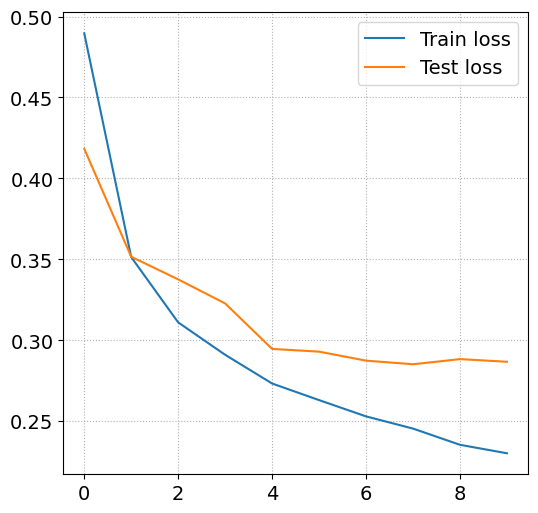

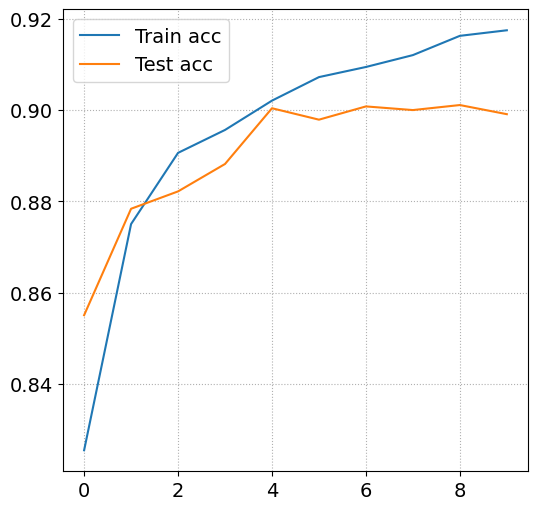

In [103]:
plt.plot(train_cost_list, label = 'Train loss')
plt.plot(test_cost_list, label = 'Test loss')
plt.legend()
plt.show()


plt.plot(train_acc_list, label = 'Train acc')
plt.plot(test_acc_list, label = 'Test acc')
plt.legend()
plt.show()

test acc = 0.8530000448226929
Label:  Dress
Prediction:  Dress


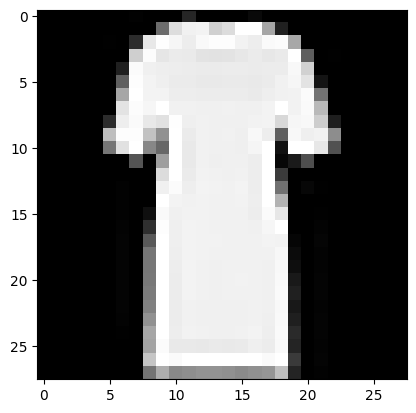

In [ ]:
model.eval()
idx2class = {i:c for c, i in fmnist_test.class_to_idx.items()}

with torch.no_grad():
    X_test = (fmnist_test.test_data[:1000]/255.).unsqueeze(1).float().to(device)
    Y_test = fmnist_test.test_labels[:1000].to(device)

    prediction = model(X_test).argmax(dim = 1) == Y_test
    acc = prediction.float().mean()
    print(f'test acc = {acc.item()}')

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, 999)
    X_single_data = fmnist_test.test_data[r:r + 1].unsqueeze(1).float().to(device)
    Y_single_data = fmnist_test.test_labels[r:r + 1].to(device)

    answer_idx = Y_single_data.item()
    print('Label: ', idx2class[answer_idx])
    # single_prediction = linear(X_single_data)
    single_prediction = model(X_single_data)

    pred_idx = torch.argmax(single_prediction, 1).item()
    print('Prediction: ', idx2class[pred_idx])
    plt.imshow(fmnist_test.test_data[r:r + 1].view(28, 28), cmap='gray', interpolation='nearest')

    plt.show()